<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Utility-Scripts" data-toc-modified-id="Utility-Scripts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Utility Scripts</a></span></li><li><span><a href="#Create-dask-array" data-toc-modified-id="Create-dask-array-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create dask array</a></span></li><li><span><a href="#Dask-dataframe" data-toc-modified-id="Dask-dataframe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dask dataframe</a></span></li><li><span><a href="#Dask-Bag-datatype" data-toc-modified-id="Dask-Bag-datatype-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dask Bag datatype</a></span></li><li><span><a href="#Dask-dealayed" data-toc-modified-id="Dask-dealayed-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dask dealayed</a></span></li><li><span><a href="#Dask-distributed" data-toc-modified-id="Dask-distributed-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dask distributed</a></span></li><li><span><a href="#Dask-machine-learning" data-toc-modified-id="Dask-machine-learning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dask machine learning</a></span><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Using-Dask-and-Joblib" data-toc-modified-id="Using-Dask-and-Joblib-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Using Dask and Joblib</a></span></li><li><span><a href="#Using-Dask's-Inbuilt-Estimators" data-toc-modified-id="Using-Dask's-Inbuilt-Estimators-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Using Dask's Inbuilt Estimators</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import dask.array as da
import graphviz

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import time

# Utility Scripts

In [5]:
def show_method_attributes(method, ncols=7):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [i for i in dir(method) if i[0]!='_' ]
    x = [i for i in x if i not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

# Create dask array

In [6]:
arr = np.random.randint(1, 1000, (1000, 1000))
darr = da.from_array(arr, chunks=(250, 250))
darr

dask.array<array, shape=(1000, 1000), dtype=int64, chunksize=(250, 250), chunktype=numpy.ndarray>

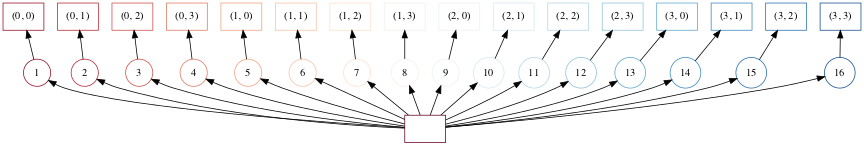

In [7]:
darr.visualize(color="order", size="9,10!")

In [8]:
show_method_attributes(darr,7)

,0,1,2,3,4,5,6
0,A,chunks,dot,moment,prod,squeeze,to_tiledb
1,T,chunksize,dtype,name,ravel,std,to_zarr
2,all,clip,flatten,nbytes,real,store,topk
3,any,compute,imag,ndim,rechunk,sum,trace
4,argmax,compute_chunk_sizes,itemsize,nonzero,repeat,swapaxes,transpose
5,argmin,conj,map_blocks,npartitions,reshape,to_dask_dataframe,var
6,argtopk,copy,map_overlap,numblocks,round,to_delayed,view
7,astype,cumprod,max,partitions,shape,to_hdf5,vindex
8,blocks,cumsum,mean,persist,size,to_svg,visualize
9,choose,dask,min,,,,


In [9]:
darr.chunks, darr.chunksize, darr.npartitions

(((250, 250, 250, 250), (250, 250, 250, 250)), (250, 250), 16)

In [10]:
res = darr.sum(axis=0)

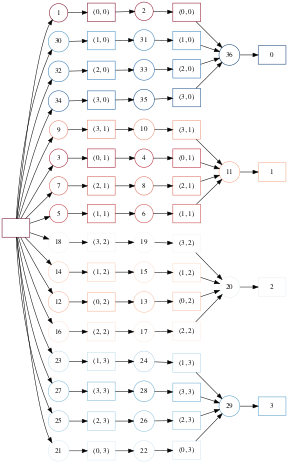

In [11]:
res.visualize(rankdir="LR", size="3,20!",color='order')

In [12]:
res.compute().shape

(1000,)

In [13]:
def numpy_mean(size=(10, 10)):
    arr = np.random.random(size=size)
    return arr.mean()

In [14]:
def dask_mean(size=(10, 10)):
    if size[0] > 10_000:
        chunks = (1000, 1000)

    else:
        chunks = (int(size[0]/10), int(size[1]/10))
        
    arr = da.random.random(size=size, chunks=chunks)
    y = arr.mean()
    return y.compute()

In [15]:
def dask_arr_chk():
    sizes = []
    times = []
    size = 10
    for i in range(5):
        dim1 = size ** (i+1)
        for j in range(4):
            dim2 = size ** (j+1)
            if dim1*dim2 in sizes:
                continue
            st = time.time()
            dask_mean(size=(dim1, dim2))
            en = time.time()
            sizes.append(dim1*dim2)
            times.append(en-st)
    return sizes, times

In [16]:
def numpy_arr_chk():
    sizes = []
    times = []
    size = 10
    for i in range(4):
        dim1 = size ** (i+1)
        for j in range(4):
            dim2 = size ** (j+1)
            if dim1*dim2 in sizes:
                continue
            st = time.time()
            numpy_mean(size=(dim1, dim2))
            en = time.time()
            sizes.append(dim1*dim2)
            times.append(en-st)
    return sizes, times

In [17]:
%%time
x1, y1 = numpy_arr_chk()

CPU times: user 1.21 s, sys: 260 ms, total: 1.47 s
Wall time: 1.51 s


In [18]:
%%time
x2, y2 = dask_arr_chk()

CPU times: user 19.9 s, sys: 235 ms, total: 20.1 s
Wall time: 5.85 s


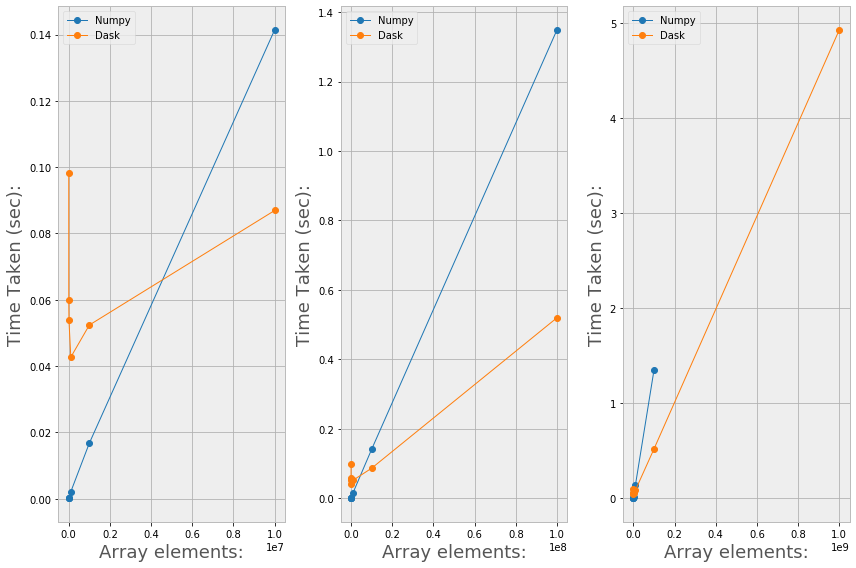

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12,8))
axs[0].plot(x1[:-1], y1[:-1], "o-", label="Numpy")
axs[0].plot(x2[:-2], y2[:-2], "o-", label="Dask")
axs[0].set_xlabel("Array elements:",fontsize=18)
axs[0].set_ylabel("Time Taken (sec):",fontsize=18)
axs[0].legend()

axs[1].plot(x1, y1, "o-", label="Numpy")
axs[1].plot(x2[:-1], y2[:-1], "o-", label="Dask")
axs[1].set_xlabel("Array elements:",fontsize=18)
axs[1].set_ylabel("Time Taken (sec):",fontsize=18)
axs[1].legend()

axs[2].plot(x1, y1, "o-", label="Numpy")
axs[2].plot(x2, y2, "o-", label="Dask")
axs[2].set_xlabel("Array elements:",fontsize=18)
axs[2].set_ylabel("Time Taken (sec):",fontsize=18)
axs[2].legend()
plt.tight_layout()
plt.show()

> In low dimensions, numpy is taking less time than Dask because Dask has to create many processes for the number of workers we set during definition of Client declaration (Fig 1). 

> But as number of array elements increases we see that Dask takes less time than Numpy (Fig 2). 

> Beyond that numpy is not able to compute because it is not able to bring whole array into memory, but Dask is able to by computings many blocks in sequential order. (Fig 3).

# Dask dataframe

In [20]:
import dask.dataframe as dd
import numpy as np
import gc
gc.enable()

In [21]:
arr = np.random.normal(0.0, 1.0, size=(1_000_000, 10))
df = dd.from_array(arr, chunksize=50_000, columns=[f"col-{i+1}" for i in range(10)])
del arr
gc.collect()

60

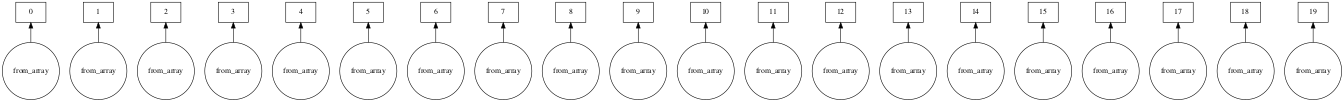

In [22]:
df.visualize(size="14,16!")

In [23]:
df.head() # Not lazy beacuse it doesn't take much computation

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10
0,2.355394,0.047476,1.430922,0.266103,-0.534345,1.724793,1.815677,-0.665457,-0.783321,-0.895571
1,-0.461224,-0.792022,-2.435997,0.335702,-0.087754,-0.503591,-1.081576,0.227199,-0.293114,0.837795
2,-0.105111,0.132810,-0.210007,1.423612,0.253600,-0.554978,0.537343,0.195174,0.076477,0.038540
3,0.793875,-1.061868,-1.548741,0.074825,-0.149578,1.588359,-1.129457,-0.962484,-0.967813,-1.723418
4,0.785428,-1.990456,0.948929,0.101523,1.620253,1.527452,-0.039559,-0.188381,-1.597944,1.724807


In [24]:
df.tail()

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10
49995,-0.580992,-0.103922,-1.745126,1.340445,-1.444702,-0.210182,-0.920287,-0.445690,0.017971,-0.086169
49996,0.383578,0.653537,-2.084588,0.084170,0.518709,0.734347,-0.064094,-1.001520,1.072643,-0.719388
49997,1.244752,1.038828,-0.733774,-0.118831,-0.327573,1.120880,-0.415298,1.071669,0.559626,-1.620535
49998,1.177122,-0.568261,-0.875843,0.559755,0.290411,-0.526195,0.479789,0.910941,-0.194231,-0.208543
49999,0.736048,0.722730,-1.453815,0.023885,0.504766,-0.509773,-0.672090,-0.561168,-0.033820,1.718496


In [25]:
df["col-1"] = (df["col-1"]*10).astype(int)

In [26]:
agg = df.groupby(by=["col-1"]).aggregate(["sum", "std", "max", "min", "mean"])

In [27]:
agg.head(2)

col-2                                       col-3                \
            sum std       max       min      mean       sum std       max   
col-1                                                                       
-48   -1.792467 NaN -1.792467 -1.792467 -1.792467 -0.273724 NaN -0.273724   
-47    1.172834 NaN  1.172834  1.172834  1.172834 -0.309595 NaN -0.309595   

                           ...     col-9                                    \
            min      mean  ...       sum std       max       min      mean   
col-1                      ...                                               
-48   -0.273724 -0.273724  ...  0.440788 NaN  0.440788  0.440788  0.440788   
-47   -0.309595 -0.309595  ... -1.380293 NaN -1.380293 -1.380293 -1.380293   

         col-10                                    
            sum std       max       min      mean  
col-1                                              
-48   -1.530354 NaN -1.530354 -1.530354 -1.530354  
-47    0.616284 NaN  0.616284  0.616284  0.616284  

[2 rows x 45 columns]

In [28]:
columns = []
for col in agg.columns.levels[0]:
    for a in agg.columns.levels[1]:
        columns.append(f"{col}.{a}")

agg.columns = columns
agg.head(2)

,col-10.max,col-10.mean,col-10.min,col-10.std,col-10.sum,col-2.max,col-2.mean,col-2.min,col-2.std,col-2.sum,...,col-8.max,col-8.mean,col-8.min,col-8.std,col-8.sum,col-9.max,col-9.mean,col-9.min,col-9.std,col-9.sum
col-1,,,,,,,,,,,,,,,,,,,,,
-48,-1.792467,NaN,-1.792467,-1.792467,-1.792467,-0.273724,NaN,-0.273724,-0.273724,-0.273724,...,0.440788,NaN,0.440788,0.440788,0.440788,-1.530354,NaN,-1.530354,-1.530354,-1.530354
-47,1.172834,NaN,1.172834,1.172834,1.172834,-0.309595,NaN,-0.309595,-0.309595,-0.309595,...,-1.380293,NaN,-1.380293,-1.380293,-1.380293,0.616284,NaN,0.616284,0.616284,0.616284


In [29]:
df_new = df.merge(agg.reset_index(), how="left", on="col-1")
df_new

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10,col-10.max,col-10.mean,col-10.min,col-10.std,col-10.sum,col-2.max,col-2.mean,col-2.min,col-2.std,col-2.sum,col-3.max,col-3.mean,col-3.min,col-3.std,col-3.sum,col-4.max,col-4.mean,col-4.min,col-4.std,col-4.sum,col-5.max,col-5.mean,col-5.min,col-5.std,col-5.sum,col-6.max,col-6.mean,col-6.min,col-6.std,col-6.sum,col-7.max,col-7.mean,col-7.min,col-7.std,col-7.sum,col-8.max,col-8.mean,col-8.min,col-8.std,col-8.sum,col-9.max,col-9.mean,col-9.min,col-9.std,col-9.sum
npartitions=20,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


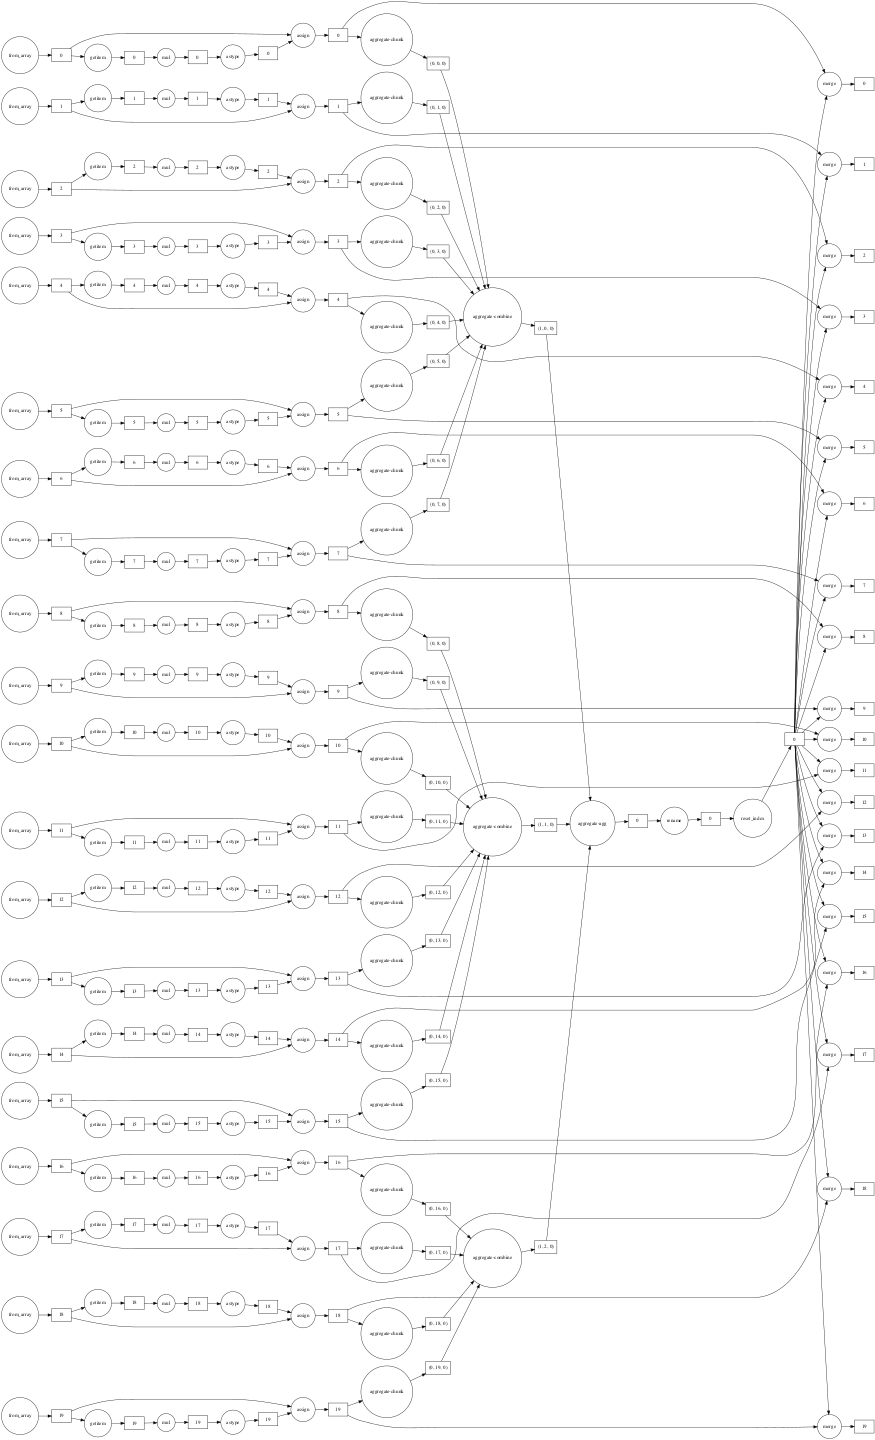

In [30]:
df_new.visualize(rankdir="LR", size="20, 15!")

In [31]:
df_new.compute().head()

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10,...,col-8.max,col-8.mean,col-8.min,col-8.std,col-8.sum,col-9.max,col-9.mean,col-9.min,col-9.std,col-9.sum
0,23,0.047476,1.430922,0.266103,-0.534345,1.724793,1.815677,-0.665457,-0.783321,-0.895571,...,18.651710,1.007940,2.952001,-3.178522,0.007381,45.868634,1.003638,3.577919,-3.717857,0.018151
1,-4,-0.792022,-2.435997,0.335702,-0.087754,-0.503591,-1.081576,0.227199,-0.293114,0.837795,...,-107.032853,1.003814,4.616930,-4.226584,-0.002956,-49.175555,0.999676,4.107958,-3.709088,-0.001358
2,-1,0.132810,-0.210007,1.423612,0.253600,-0.554978,0.537343,0.195174,0.076477,0.038540,...,229.367140,0.996922,4.110957,-4.338032,0.005822,-335.277838,1.002514,4.096124,-4.102553,-0.008510
3,7,-1.061868,-1.548741,0.074825,-0.149578,1.588359,-1.129457,-0.962484,-0.967813,-1.723418,...,-301.246945,0.997314,3.728079,-4.011996,-0.010049,488.947746,0.999438,3.628979,-4.111194,0.016310
4,7,-1.990456,0.948929,0.101523,1.620253,1.527452,-0.039559,-0.188381,-1.597944,1.724807,...,-301.246945,0.997314,3.728079,-4.011996,-0.010049,488.947746,0.999438,3.628979,-4.111194,0.016310


In [32]:
df_new.shape[0].compute(), df_new.shape[1]

(1000000, 55)

# Dask Bag datatype

In [33]:
import dask.bag as db

lst = []
for i in range(5):
    lst.append({f"Name.{name}": value for name,
                value in np.random.randint(1, 10, (5, 2))})
    lst.append(np.random.randint(2, 5, (2, 4)))
    lst.append(np.random.randint(1, 1000, (1,)))
    lst.append([i for i in range(100, 200, 10)])

b = db.from_sequence(lst)
b.take(1)

({'Name.4': 8, 'Name.5': 8, 'Name.1': 9, 'Name.7': 9},)

In [34]:
def fil(el):
    if type(el) != dict and type(el) != list:
        return True
    else:
        return False

filmap = b.filter(fil).map(lambda x: x**2)

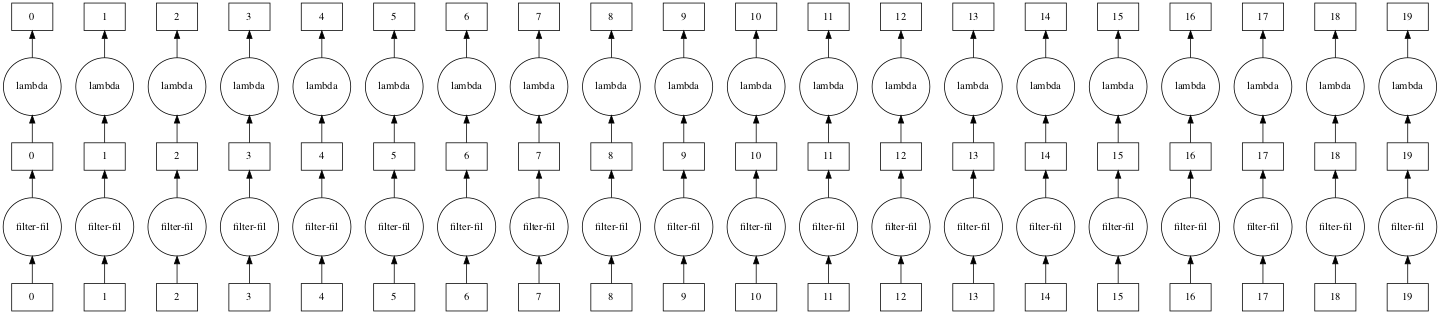

In [35]:
filmap.visualize(size="15,10!")

In [36]:
filmap.compute()

[array([[16,  4,  4,  9],
        [ 4, 16,  4, 16]]), array([339889]), array([[ 9, 16,  9,  4],
        [ 9, 16,  9, 16]]), array([372100]), array([[ 9,  4,  9, 16],
        [ 9,  4, 16,  4]]), array([48841]), array([[ 9,  9,  4,  4],
        [ 4,  4,  9, 16]]), array([11025]), array([[16,  9,  9,  9],
        [16,  4,  9,  4]]), array([304704])]

In [37]:
comp = filmap.flatten().mean()

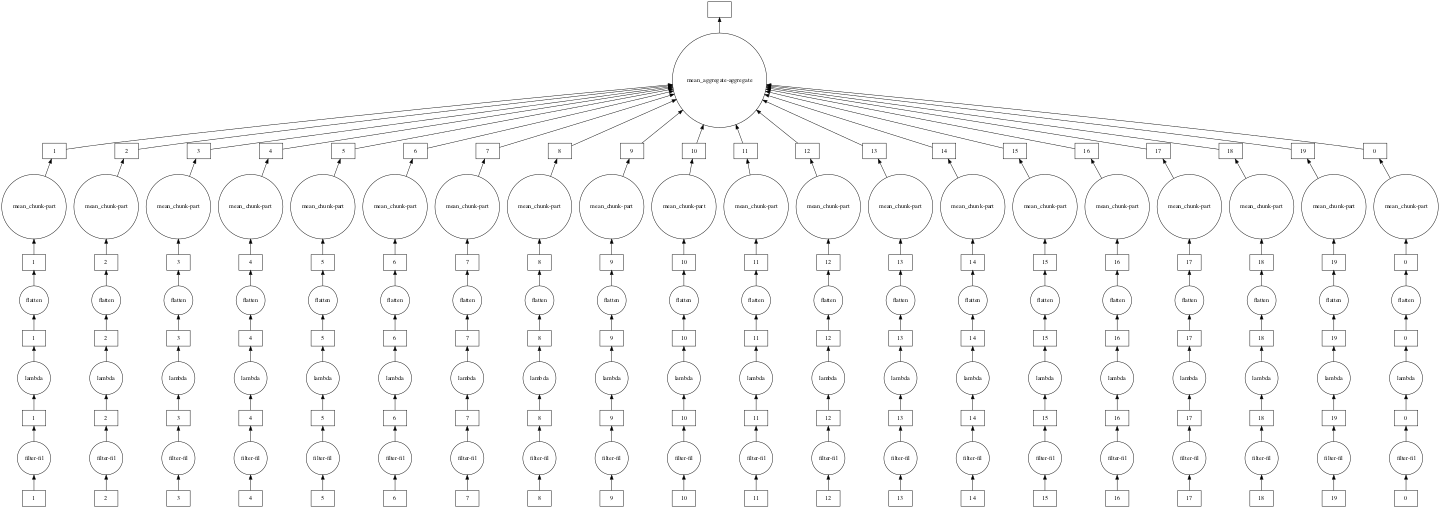

In [38]:
comp.visualize(size="15, 15!")

In [39]:
comp.compute()

array([71777.33333333, 71776.33333333, 71776.06666667, 71777.13333333])

# Dask dealayed

In [40]:
import dask.delayed as delay


@delay
def sq(x):
    return x**2


@delay
def add(x, y):
    return x+y


@delay
def sum(arr):
    sum = 0
    for i in range(len(arr)):
        sum += arr[i]
    return sum

In [41]:
# Adding tasks here is like adding nodes to graphs.
# You can add new taks based on results of prevoius tasks.
# Dask won't compute them right away. It will make a graph as
# you call them. And then COmpute the whole graph parallely.
lst = list(np.arange(1, 11))

for i in range(3):
    temp = []
    if i == 0:
        for j in range(0, len(lst)):
            temp.append(sq(lst[j]))
    elif i == 1:
        for j in range(0, len(lst)-1, 2):
            temp.append(add(lst[j], lst[j+1]))
    else:
        temp.append(sum(lst))
    lst = temp  # New functions will be computed on last results

lst

[Delayed('sum-e2d4d40c-dcd4-46bc-9c31-d4e4bc8bb909')]

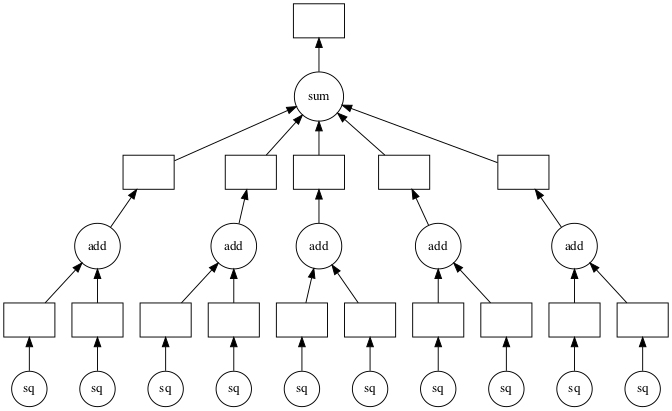

In [42]:
lst[0].visualize(size="7,10!")

In [43]:
lst[0].compute()

385

# Dask distributed

In [44]:
from dask.distributed import Client, LocalCluster

In [45]:
client = Client(processes=False, threads_per_worker=4, n_workers=4, memory_limit='8GB')
client

Client Scheduler: inproc://192.168.1.6/7671/1 Dashboard: http://192.168.1.6/7671/1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 32.00 GB


In [46]:
def sq(x):
    return x**2

inputs = np.arange(0, 10000000)

In [47]:
sent = client.submit(sq, 1000000)
sent # Pending: Not Complete

<Future: status: pending, key: sq-9a1786adbf53398e530da10e2e68942a>

In [48]:
sent # Finished (after a few sec): Complete 

<Future: status: pending, key: sq-9a1786adbf53398e530da10e2e68942a>

In [49]:
result = sent.result()
result

1000000000000

In [50]:
sent = client.submit(sq, inputs,)
sent

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/distributed/worker.py:3239: UserWarning: Large object of size 80.00 MB detected in task graph: 
  (array([      0,       1,       2, ..., 9999997, 9999998, 9999999]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s)


<Future: status: pending, key: sq-b338d0ac25d13b66f3508cdee88cd4ad>

In [51]:
sent

<Future: status: pending, key: sq-b338d0ac25d13b66f3508cdee88cd4ad>

In [52]:
sent.result()

array([             0,              1,              4, ...,
       99999940000009, 99999960000004, 99999980000001])

# Dask machine learning

## Regression

In [53]:
from dask_ml.datasets import make_regression
import dask.dataframe as dd

X, y = make_regression(n_samples=1e6, chunks=50000)

In [54]:
df = dd.from_dask_array(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.358950,-0.498831,-0.535799,1.580581,0.286899,-0.371748,-0.221641,0.406543,0.375431,-2.442352,...,0.315890,-1.919278,1.019670,-1.886140,0.621629,-0.808060,-0.541163,-0.251816,-0.033273,0.676339
1,-0.900643,0.882926,-0.798914,-1.509144,-0.769928,0.346382,1.216388,1.718924,-0.842193,-1.638567,...,-2.147612,0.759154,-1.113491,-0.451714,-1.528194,0.022006,-0.957922,0.916499,0.201365,0.292705
2,0.000719,0.532952,-1.545777,2.031839,-0.061490,0.281503,0.509280,-1.368098,1.916582,0.995998,...,-0.908850,-0.373360,-0.277391,0.042215,0.090104,0.432970,-0.924354,0.138625,0.177114,0.756199
3,-0.488512,0.452186,1.510726,1.390235,-1.004588,-0.326300,-0.418627,-0.561692,-0.709193,0.095703,...,-0.166720,-1.784963,1.015980,1.255240,-3.737513,1.106920,-0.646097,0.503372,-0.085564,2.022340
4,-1.864874,0.702494,0.041322,2.145365,0.739889,1.639084,0.819963,-0.280360,0.790044,-1.905206,...,-1.012995,-1.161694,1.392614,0.210968,0.059847,-0.547891,-1.133553,0.315898,0.649817,-0.713974


In [61]:
import sklearn
# from dask_ml.model_selection import train_test_split, GridSearchCV

# this fails
# xtr, ytr, xval, yval = train_test_split(X, y)

In [62]:
# this works

from sklearn.model_selection import train_test_split

xtr, ytr, xval, yval = train_test_split(X, y)

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/utils/__init__.py:221: PerformanceWarning: Slicing with an out-of-order index is generating 35642 times more chunks
  return X[indices]
/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/utils/__init__.py:221: PerformanceWarning: Slicing with an out-of-order index is generating 11872 times more chunks
  return X[indices]


In [63]:
from sklearn.linear_model import ElasticNet

search_params = {
    "alpha": [.01, .005],
    "l1_ratio": [0.6, 0.8],
    "normalize": [True, False],
}

In [65]:
from sklearn.model_selection import GridSearchCV

gsearch = GridSearchCV(ElasticNet(), search_params, cv=10)
#gsearch.fit(X, y)

In [66]:
#gsearch.best_params_

In [67]:
#gsearch.best_score_

## Classification

In [68]:
from dask_ml.datasets import make_classification
import dask.dataframe as dd

X, y = make_classification(n_samples=1e6, chunks=50000) # number of classes here are 2

In [71]:
# from dask_ml.model_selection import train_test_split, GridSearchCV

# xtr, xval, ytr, yval = train_test_split(X, y)

In [72]:
from sklearn.model_selection import train_test_split

xtr, ytr, xval, yval = train_test_split(X, y)

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/utils/__init__.py:221: PerformanceWarning: Slicing with an out-of-order index is generating 35611 times more chunks
  return X[indices]
/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/utils/__init__.py:221: PerformanceWarning: Slicing with an out-of-order index is generating 11874 times more chunks
  return X[indices]


In [73]:
from sklearn.linear_model import LogisticRegression

search_params = {
    "C": [.05, .005],
    #"penalty": ["l2", "l1"],
    "class_weight": [None, "balanced"],
    "solver": ["lbfgs"]
}

In [74]:
gsearch = GridSearchCV(LogisticRegression(), search_params, cv=10)
#gsearch.fit(X, y)

In [75]:
#gsearch.best_params_

In [76]:
#gsearch.best_score_

## Using Dask and Joblib

In [77]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [78]:
import joblib

#client = Client() # Not able to make client here
LR = LogisticRegression(C=0.01, class_weight="balanced", penalty="l2", solver="lbfgs")

In [79]:
#with joblib.parallel_backend('dask'):
#    LR.fit(xtr, ytr)
#    preds = LR.predict(xval)
#    
#preds[0:5], yval[0:5]

In [80]:
#preds[0:5], yval.compute()[0:5]

## Using Dask's Inbuilt Estimators

In [81]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [82]:
xtr.shape, ytr.shape, xval.shape, yval.shape

((750000, 20), (250000, 20), (750000,), (250000,))

In [84]:
from dask_ml.cluster import KMeans

# KM = KMeans(n_clusters=2)

# KM.fit(xtr, ytr)
# preds = KM.predict(xval)

# preds[0:5], yval[0:5]

In [85]:
# preds.compute()[0:5], yval.compute()[0:5]